In [20]:
import numpy as np
import scipy.optimize as sci
from scipy import constants
#import sigfig as sf # Pacote para expressar incertezas e dígitos significativos
import pandas as pd
from scipy.integrate import quad

In [21]:
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 9pt font in plots, to match 9pt caption fontsize in RevTeX
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "figure.titlesize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "lines.linewidth": 1,
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "axes.linewidth": 0.5
}
plt.rcParams.update(tex_fonts)

from my_plot import set_size
plt.rcParams["figure.figsize"] = set_size(255)

In [6]:
# Module of Dr. Sato's Analytical Model
import SatoLowAltNeutronBkg as sato

In [22]:
x = np.logspace(-9, 5, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
Φ_tot = np.trapz(y_flux,x, 0.0001)
Φ_tot

0.008193178421262026

In [28]:
x = np.logspace(-9, 5, 1000)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
Φ_tot = np.trapz(y_flux,x, 0.0001)

for i in np.arange(0, np.size(x)):
    t = np.logspace(x[i], x[i + 1], 100)
    y_leth = sato.EΦ(t,1034,9.76,0.25)
    y_flux = y_leth/t 
    Φ = np.trapz(y_flux,t, 0.001)
    print("{:E}".format(x[i]), "{:E}".format(x[i + 1]), "{:E}".format((1e10)*Φ/Φ_tot))

1.000000E-09 1.032795E-09 5.306634E-02
1.032795E-09 1.066665E-09 5.480667E-02
1.066665E-09 1.101646E-09 5.660395E-02
1.101646E-09 1.137774E-09 5.846022E-02
1.137774E-09 1.175087E-09 6.037750E-02
1.175087E-09 1.213624E-09 6.235751E-02
1.213624E-09 1.253424E-09 6.440258E-02
1.253424E-09 1.294530E-09 6.651460E-02
1.294530E-09 1.336984E-09 6.869590E-02
1.336984E-09 1.380830E-09 7.094882E-02
1.380830E-09 1.426114E-09 7.327556E-02
1.426114E-09 1.472883E-09 7.567859E-02
1.472883E-09 1.521186E-09 7.816043E-02
1.521186E-09 1.571072E-09 8.072372E-02
1.571072E-09 1.622595E-09 8.337111E-02
1.622595E-09 1.675808E-09 8.610511E-02
1.675808E-09 1.730766E-09 8.892899E-02
1.730766E-09 1.787526E-09 9.184524E-02
1.787526E-09 1.846147E-09 9.485746E-02
1.846147E-09 1.906691E-09 9.796814E-02
1.906691E-09 1.969220E-09 1.011810E-01
1.969220E-09 2.033800E-09 1.044992E-01
2.033800E-09 2.100498E-09 1.079264E-01
2.100498E-09 2.169384E-09 1.114657E-01
2.169384E-09 2.240528E-09 1.151211E-01
2.240528E-09 2.314005E-09

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [34]:
a = np.linspace(-9, 5, 750)
for i in np.arange(0, np.size(a)):
    t = np.logspace(x[i], x[i + 1], 1000)
    y_leth = sato.EΦ(t,1034,9.76,0.25)
    y_flux = y_leth / t 
    Φ = np.trapz(y_flux,t, 0.001)
    print("{:E}".format(x[i]), "{:E}".format(x[i + 1]), "{:E}".format((1e10)*Φ/Φ_tot))

1.000000E-09 1.032795E-09 5.306634E-02
1.032795E-09 1.066665E-09 5.480667E-02
1.066665E-09 1.101646E-09 5.660395E-02
1.101646E-09 1.137774E-09 5.846022E-02
1.137774E-09 1.175087E-09 6.037750E-02
1.175087E-09 1.213624E-09 6.235751E-02
1.213624E-09 1.253424E-09 6.440258E-02
1.253424E-09 1.294530E-09 6.651460E-02
1.294530E-09 1.336984E-09 6.869590E-02
1.336984E-09 1.380830E-09 7.094882E-02
1.380830E-09 1.426114E-09 7.327556E-02
1.426114E-09 1.472883E-09 7.567859E-02
1.472883E-09 1.521186E-09 7.816043E-02
1.521186E-09 1.571072E-09 8.072372E-02
1.571072E-09 1.622595E-09 8.337111E-02
1.622595E-09 1.675808E-09 8.610511E-02
1.675808E-09 1.730766E-09 8.892899E-02
1.730766E-09 1.787526E-09 9.184524E-02
1.787526E-09 1.846147E-09 9.485746E-02
1.846147E-09 1.906691E-09 9.796814E-02
1.906691E-09 1.969220E-09 1.011810E-01
1.969220E-09 2.033800E-09 1.044992E-01
2.033800E-09 2.100498E-09 1.079264E-01
2.100498E-09 2.169384E-09 1.114657E-01
2.169384E-09 2.240528E-09 1.151211E-01
2.240528E-09 2.314005E-09

In [26]:
Δx = 0.01
for i in np.linspace(-9, 5, 100):
    b = 5
    a = 5 - (5-(-9))/100
    x = np.logspace(a, b, 10000)
    y_leth = sato.EΦ(x,1034,9.76,0.25)
    y_flux = y_leth/x 
    Φ = np.trapz(y_flux,x, 0.0001)
    print('A fração no intervalo entre b = 10^',b, ' e a = 10^',a, ' é de ', int(10000*Φ/Φ_tot),'/10000', sep = '')

A fração no intervalo entre b = 10^5 e a = 10^4 é de 34/10000
A fração no intervalo entre b = 10^4 e a = 10^3 é de 265/10000
A fração no intervalo entre b = 10^3 e a = 10^2 é de 1686/10000
A fração no intervalo entre b = 10^2 e a = 10^1 é de 1543/10000
A fração no intervalo entre b = 10^1 e a = 10^0 é de 1573/10000
A fração no intervalo entre b = 10^0 e a = 10^-1 é de 1056/10000
A fração no intervalo entre b = 10^-1 e a = 10^-2 é de 507/10000
A fração no intervalo entre b = 10^-2 e a = 10^-3 é de 385/10000
A fração no intervalo entre b = 10^-3 e a = 10^-4 é de 350/10000
A fração no intervalo entre b = 10^-4 e a = 10^-5 é de 330/10000
A fração no intervalo entre b = 10^-5 e a = 10^-6 é de 302/10000
A fração no intervalo entre b = 10^-6 e a = 10^-7 é de 366/10000
A fração no intervalo entre b = 10^-7 e a = 10^-8 é de 1488/10000
A fração no intervalo entre b = 10^-8 e a = 10^-9 é de 107/10000


In [33]:
print('#Emin   Emax    dN/dE')
print('#--------------------')

for i in [5,4,3,2,1,0,-1,-2,-3,-4,-5,-6,-7,-8]:
    b = i
    a = i - 1
    x = np.logspace(a, b, 10000)
    y_leth = sato.EΦ(x,1034,9.76,0.25)
    y_flux = y_leth/x 
    Φ = np.trapz(y_flux,x, 0.0001)

    print('10E',a, ' 10E',b,' ', int(10000*Φ/Φ_tot),'.', sep = '')

#Emin   Emax    dN/dE
#--------------------
10E4 10E5 34.
10E3 10E4 265.
10E2 10E3 1686.
10E1 10E2 1543.
10E0 10E1 1573.
10E-1 10E0 1056.
10E-2 10E-1 507.
10E-3 10E-2 385.
10E-4 10E-3 350.
10E-5 10E-4 330.
10E-6 10E-5 302.
10E-7 10E-6 366.
10E-8 10E-7 1488.
10E-9 10E-8 107.


In [36]:
print('#Emin   Emax    dN/dE')
print('#--------------------')

for i in [100,90,80,70,60,50,40,30,20,10]:
    b = i
    a = i - 10
    x = np.linspace(a, b, 10)
    y_leth = sato.EΦ(x,1034,9.76,0.25)
    y_flux = y_leth/x 
    Φ = np.trapz(y_flux,x, 0.0001)

    print(a, '. ',b,'. ', int(10000*Φ/Φ_tot),'.', sep = '')

#Emin   Emax    dN/dE
#--------------------
90. 100. 124.
80. 90. 133.
70. 80. 141.
60. 70. 148.
50. 60. 154.
40. 50. 161.
30. 40. 172.
20. 30. 201.
10. 20. 306.


ValueError: cannot convert float NaN to integer

Fluxo no rio de janeiro = 0.008193178421262026 nêutrons por segundo por centímetro quadrado.
Este fluxo é equivalente à 707.890615597039 nêutrons por dia por centímetro quadrado

32.2963961877815% está entre 10^3MeV e 10^1MeV

26.299542626014677% está entre 10^1MeV e 10^-1MeV

18.774388635304476% está entre 10^-1MeV e 10^-6MeV

18.553448743562853% está entre 10^-6MeV e 10^-8MeV

In [6]:
32.2963961877815+26.299542626014677+18.774388635304476+18.553448743562853

95.9237761926635

In [7]:
0.008193178421262026*24*60*60

707.890615597039

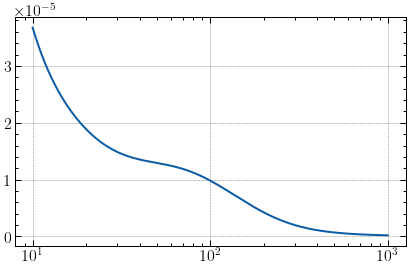

In [8]:
x = np.logspace(1, 3, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
plt.plot(x, y_flux)
plt.xscale('log')

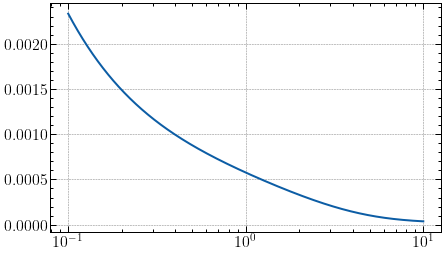

In [9]:
x = np.logspace(-1, 1, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
plt.plot(x, y_flux)
plt.xscale('log')

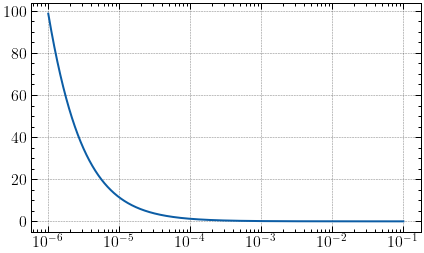

In [10]:
x = np.logspace(-6, -1, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
plt.plot(x, y_flux)
plt.xscale('log')

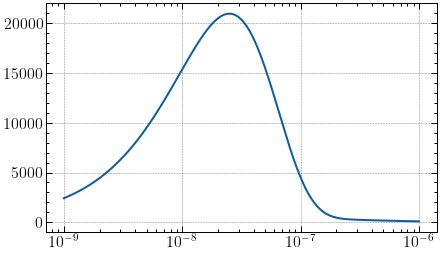

In [11]:
x = np.logspace(-9, -6, 10000)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
plt.plot(x, y_flux)
plt.xscale('log')

Neutrons in the energy range of concern, 100–
10,000 eV, can be effectively shielded in surface envi-
ronments. Shielding factors of up to 100 have been
demonstrated with shields of an areal density less than
100 g cm −2 [67]. The same result is found in the context
of upcoming and ongoing CEvNS experiments at reac-
tors [6, 68–72]: typical background rates at the surface of
around 10,000 events per day and kilogram of detector in
the energy range from 20–10,000 eV are reported. This
agrees well with our simplified model. We will present
results as a function of background event rates, where
passive shielding yields approximately a suppression fac-
tor of 100 and active shielding would add another factor
of 5–10. Note that, active shielding requires the detector
to be read out in real time.

0.0010072927962931318

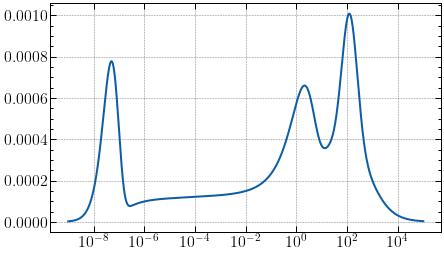

In [14]:
x = np.logspace(-9, 5, 10000)
log_x = np.log10(x)
y_leth = sato.EΦ(x,1034,9.76,0.25)
y_flux = y_leth/x
plt.plot(x, x*y_flux)
plt.xscale('log')
np.amax(y_leth)

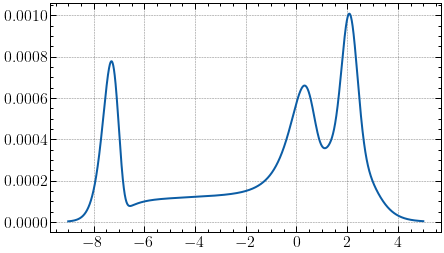

In [15]:
plt.plot(log_x, x*y_flux)
#plt.xscale('log')

In [16]:
def contagem_1000eventos(f, a, b):
    # Plotando o gráfico no intervalo inserido    
    t = np.linspace(a, b, 1000)
    plt.plot(t, f(t), 'b-')
    
    # Encontrando o máximo da função
    ymax = max(f(t))
    print("O máximo da função no intervalo inserido [",a,",",b,"] é ymax = ", ymax)
    
    # Encontrando a área do retângulo
    Area = (b - a)*ymax
    print("A área do retângulo definido pelos intervalos é de ", Area)
    
    # Fazendo as jogadas
    eventos = 1000
    acertos = 0
    for i in range(0,eventos):
        x = rdm.uniform(a,b)
        y = rdm.uniform(0,ymax)
        plt.plot(x,y, '.')
        if y <= f(x):
            acertos = acertos + 1
            
    print('eventos = ', eventos)    
    print('acertos =', acertos)
    print('acertos/eventos = ', acertos/eventos)
    print('área da integral = ', (acertos/eventos)*Area)

In [17]:
contagem_1000eventos(sato.EΦ(x,1034,9.76,0.25), 1e-9, 1e5)

TypeError: 'numpy.ndarray' object is not callable